### 神经网络 sigmoid 函数 逻辑回归

sigmoid 函数定义域 (负无穷、正无穷)，值域 (0, 1)

> 最大概似法：
比方统计一枚不太规则的硬币那一面出现的概率更大，将每次抛硬币都看作独立的事件，相互不受影响，则每次抛硬币大自然都会给出概率尽可能高的结果，将每次抛出的样本结果出现的概率累计，应该趋向最大

> 交叉熵：
利用最大概似法得到的损失函数，称为交叉熵

In [1]:
import torch
import numpy as np
from torch import nn, optim
import matplotlib.pyplot as plt

In [3]:
cluster = torch.ones(500,2)

In [6]:
# 4 和 -4 为期望值、2为标准差，生成两批随机数据，共 1000 个数据样本
data0 = torch.normal(4*cluster, 2)
data1 = torch.normal(-4*cluster, 2)

In [4]:
# 生成 0、1 标签
label0 = torch.zeros(500)
label1 = torch.ones(500)

In [7]:
# 合并 data
x = torch.cat((data0,data1)).type(torch.FloatTensor)

In [8]:
# 合并 label,并扩展 第一维
label = torch.cat((label0,label1))
label = torch.unsqueeze(label,dim=1)

In [9]:
# data 和 label 在第一维合并
x = torch.cat((x,label), dim=1)
# 洗牌
np.random.shuffle(x.numpy())

In [10]:
# x.numpy()[:,2] ，合并后的 label 列
y = torch.tensor(x.numpy()[:,2]).type(torch.LongTensor)

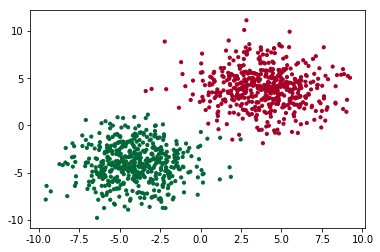

In [11]:
plt.scatter(x.numpy()[:,0], x.numpy()[:,1], c=y.numpy(), s=10, cmap='RdYlGn')

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 输入是两个特征，横轴和纵轴，输出的是两个类的 "得分" 情况，假设哪类 “分数” 高，就属于那一类
        self.linear = nn.Linear(2,2)
        
    def forward(self, x):
        x = self.linear(x)
        # sigmoid 生成两个类的概率，“分数” 高的类所得到的概率就高，且两个类的概率之和为 1
        x = torch.sigmoid(x)
        return x

In [22]:
inputs = torch.tensor(x.numpy()[:,0:2])
target = y
model = Net()

In [14]:
a = torch.randn(4, 4)
a

tensor([[ 0.9648,  0.0979, -1.3265, -1.4836],
        [-1.3474, -0.1985, -1.6748, -0.1700],
        [ 0.1317, -0.6271, -0.5995, -0.3354],
        [-0.9544,  0.4020, -1.1769,  0.1231]])

In [15]:
b = torch.sigmoid(a)
b

tensor([[0.7241, 0.5245, 0.2097, 0.1849],
        [0.2063, 0.4505, 0.1578, 0.4576],
        [0.5329, 0.3482, 0.3545, 0.4169],
        [0.2780, 0.5992, 0.2356, 0.5307]])

In [16]:
# dim=1，取出列值最大的
torch.max(b, dim=1)

torch.return_types.max(
values=tensor([0.7241, 0.4576, 0.5329, 0.5992]),
indices=tensor([0, 3, 0, 1]))

In [20]:
def train(inputs, target, model, epochs, lr=0.02):
    # 定义 交叉熵 损失函数
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    output = None
    for epoch in range(epochs):
        # 输出分成两个 类别 各自的 概率
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 20 == 0:
            draw(inputs, target, output)
    return model, loss, output

def draw(inputs, target, output):
    plt.cla()
    # 取出概率最大的类别标签
    output = torch.max((output), 1)[1]
    pred_y = output.numpy()
    target_y = target.numpy()
    # 用预测画图
    plt.scatter(inputs.numpy()[:,0], inputs.numpy()[:,1], c=pred_y, s=10, cmap='RdYlGn')
    # 求预测精确度
    accuracy = sum(pred_y == target_y) / pred_y.size
    plt.text(1.5, -4, 'Accuracy=%s' % (accuracy), fontdict={'size':20, 'color':'red'})
    plt.pause(0.05)

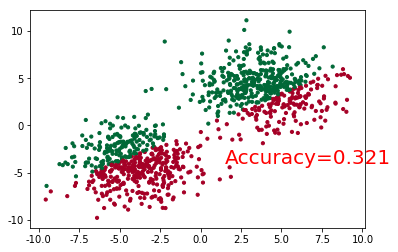

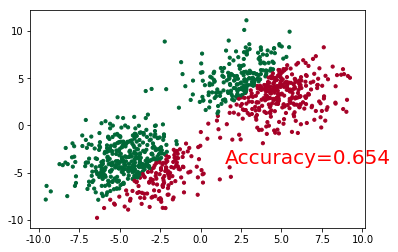

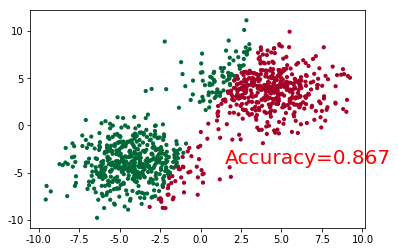

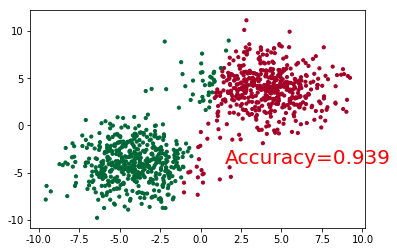

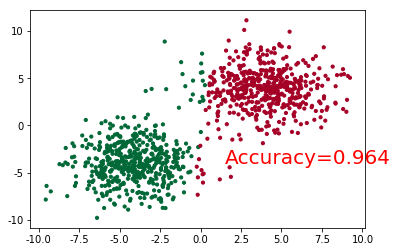

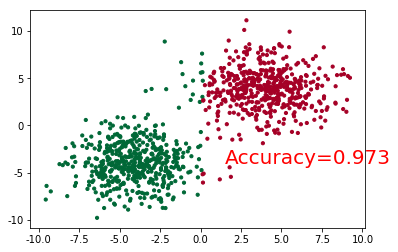

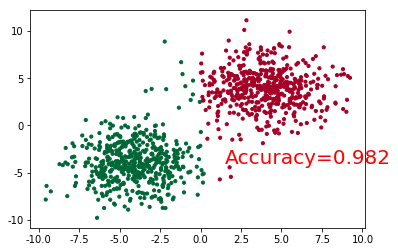

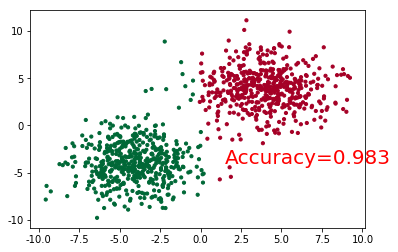

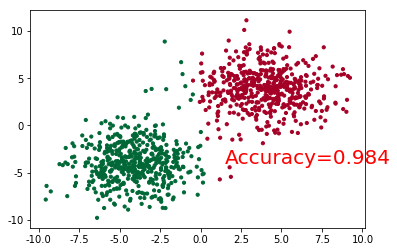

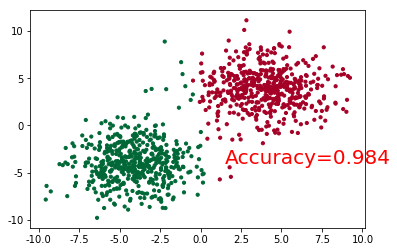

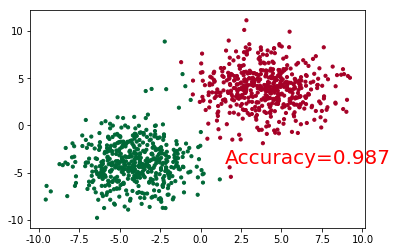

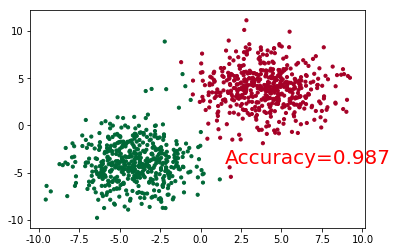

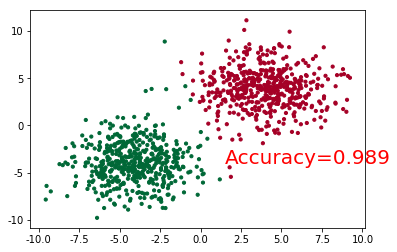

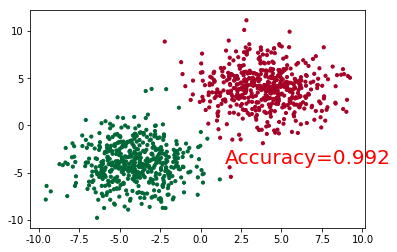

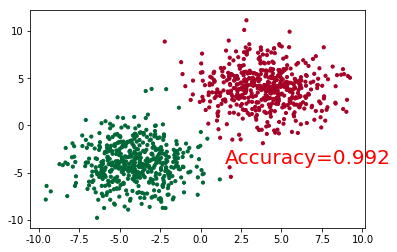

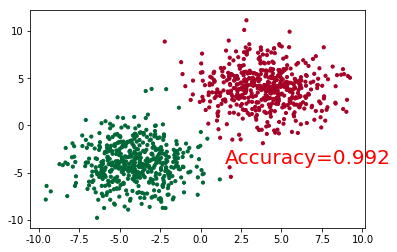

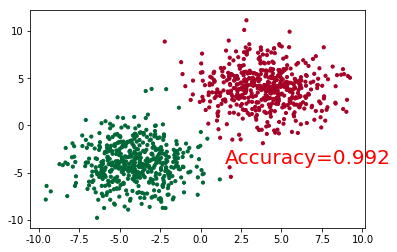

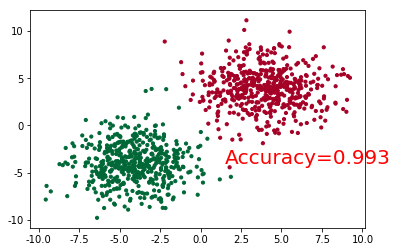

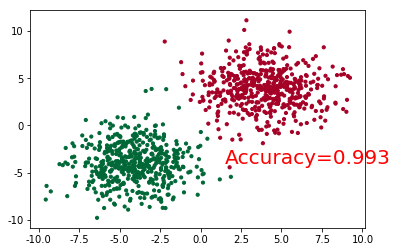

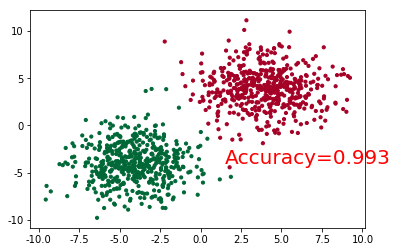

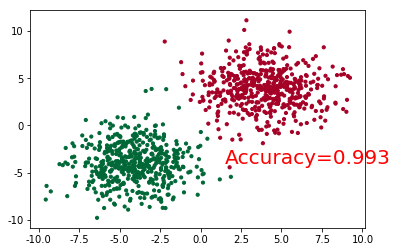

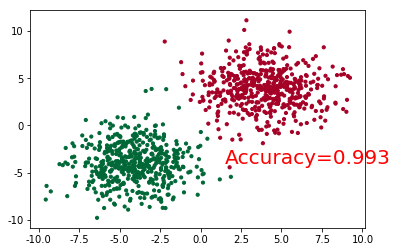

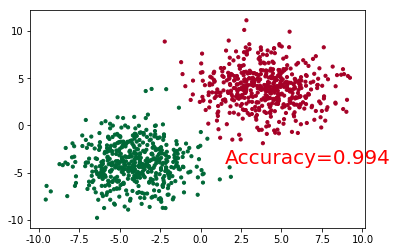

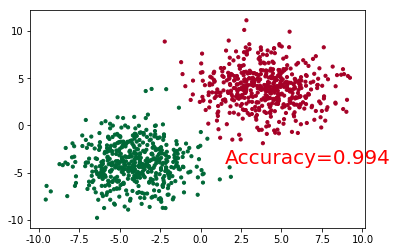

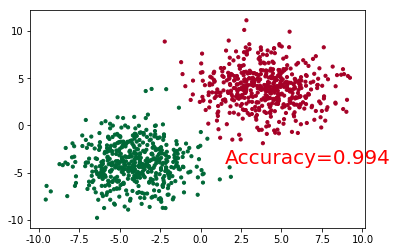

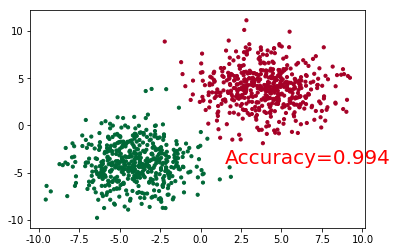

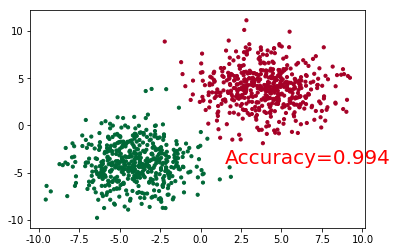

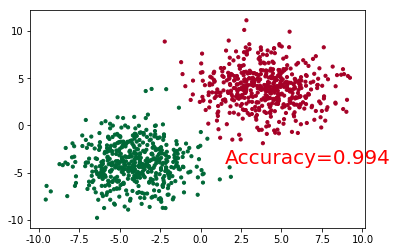

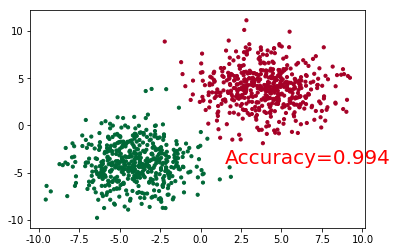

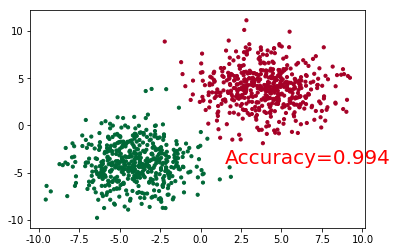

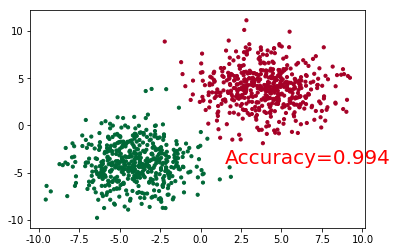

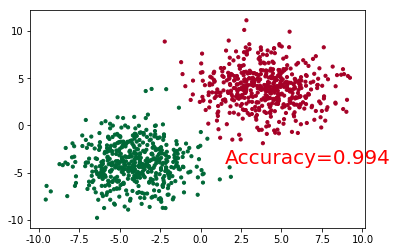

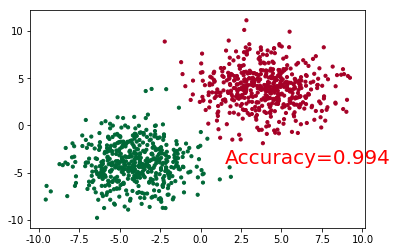

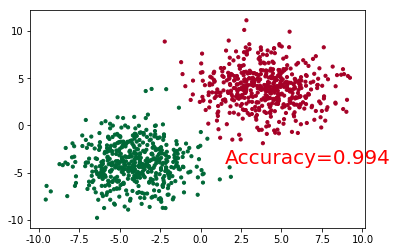

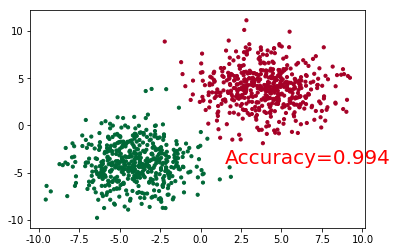

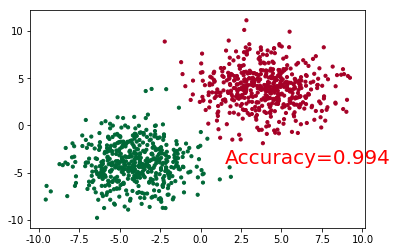

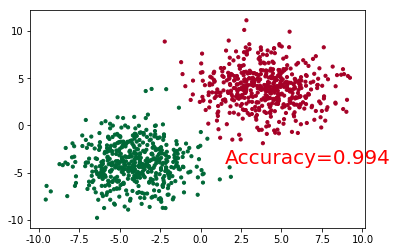

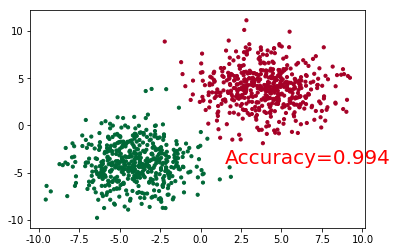

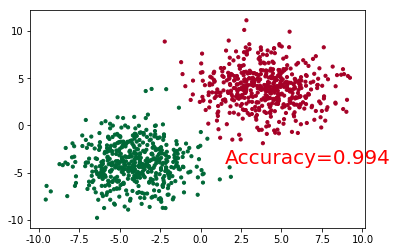

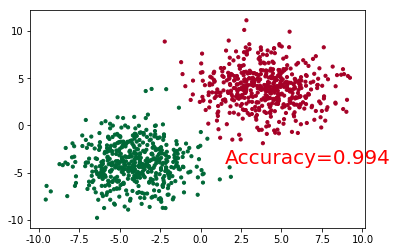

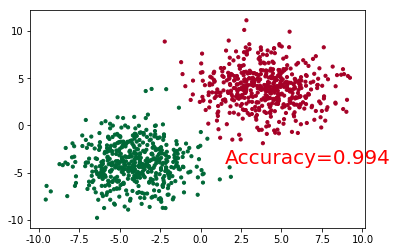

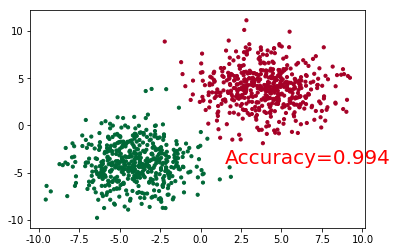

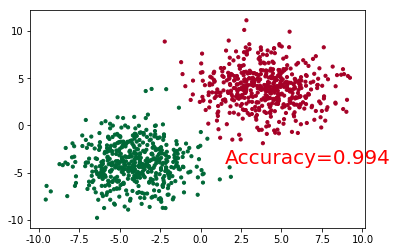

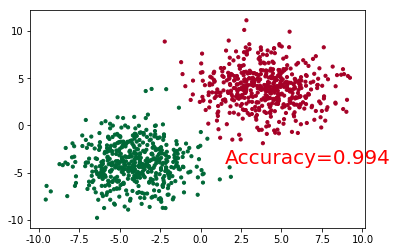

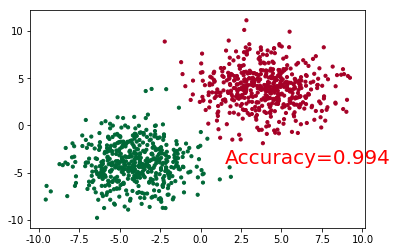

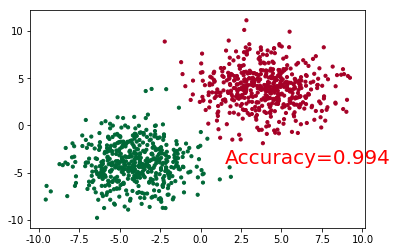

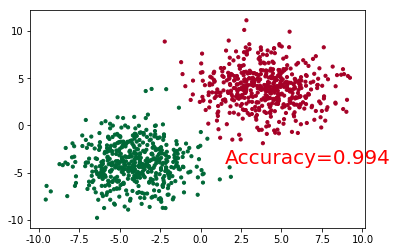

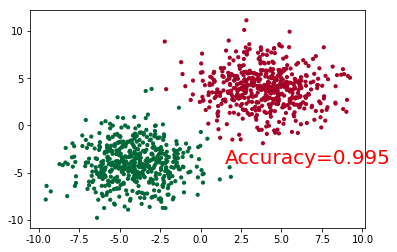

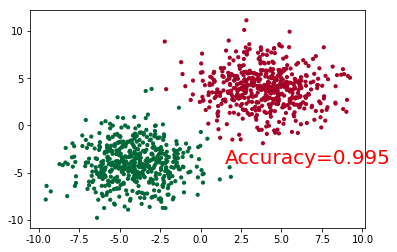

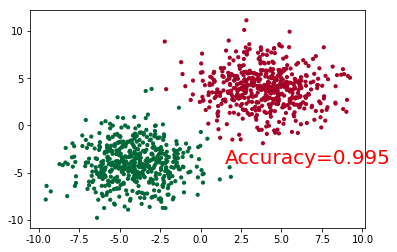

In [23]:
model, loss, output = train(inputs, target, model, 1000)